# Example: Working with the Iris data set

Classification with scikit-learn consists of the following high level stages
1. Transform the data into a numpy array of numbers: a *feature matrix* and a *target vector*
2. Select an estimator (either a classifier or regresor)
3. Train the estimator (model) with `model.fit(X_train, y_train)`
4. Assess the performance of the trained model(scikit provides numerous metrics) using `model.predict(X_test)`
5. Deploy the model to estimate samples whose target is unknown 

## Data in scikit-learn

Data in scikit-learn, is stored as a
**two-dimensional array**, of size `[n_samples, n_features]`. 

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.
  
Note:  sample, observation, instance are used synonymously in machine learning literature

###  The Iris Dataset

This is a very well known standard data set that has been around since the 1930s.
The data consists of measurements of three different species of irises:

Iris Setosa

<img src="iris_setosa.jpg" width="50%">

Iris Versicolor
<img src="iris_versicolor.jpg" width="50%">

Iris Virginica
<img src="iris_virginica.jpg" width="50%">



### Loading the Iris Data with Scikit-learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [40]:
from sklearn.datasets import load_iris
iris = load_iris()

The resulting dataset is a ``Bunch`` object: you can see what's available using
the method ``keys()``:

In [41]:
iris.keys()

dict_keys(['target_names', 'feature_names', 'data', 'target', 'DESCR'])

In [43]:
len(iris.data)

150

In [44]:
iris.data[0]

array([ 5.1,  3.5,  1.4,  0.2])

In [46]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [47]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

The features of each sample flower are stored in the ``data`` attribute of the dataset:

In [ ]:
n_samples, n_features = iris.data.shape
print(n_samples)
print(n_features)
# the sepal length, sepal width, petal length and petal width of the first sample (first flower)
print(iris.data[0])

The information about the class of each sample is stored in the ``target`` attribute of the dataset:

In [49]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [ ]:
print(iris.target)

The names of the classes are stored in the last attribute, namely ``target_names``:

In [52]:
print(iris.feature_names)  # raja
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


This data is four dimensional, but we can visualize two of the dimensions
at a time using a simple scatter-plot.  Again, we'll start by enabling
matplotlib inline mode:

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt


petal width (cm)
sepal length (cm)


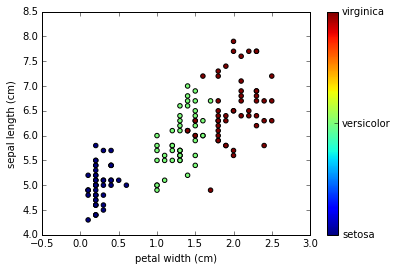

In [55]:
# The below x and y refer to the axis of the graph NOT the instance matrix and target vector

x_index = 3
y_index = 0

print()
print(iris.feature_names[x_index])
print(iris.feature_names[y_index])

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

### Quick Exercise:

**Change** `x_index` **and** `y_index` **in the above script
and find a combination of two parameters
which maximally separate the three classes.**

This exercise is a preview of **dimensionality reduction**, which we'll see later.

## Training and Testing

In [56]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)

# We will use a variation of NB 
from sklearn.naive_bayes import GaussianNB

# fit a Naive Bayes model to the data
model = GaussianNB()
model.fit(X_train, y_train)

# make predictions
expected = y_test
predicted = model.predict(X_test)

In [57]:
# Import  metrics
from sklearn import metrics

# summarize the fit of the model

print(metrics.accuracy_score(expected, predicted))
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

0.96
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       0.93      0.93      0.93        15
          2       0.94      0.94      0.94        16

avg / total       0.96      0.96      0.96        50

[[19  0  0]
 [ 0 14  1]
 [ 0  1 15]]
